In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


# Step 1: Load Dataset

In [2]:
# Load the dataset
sales_df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")

sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# checks the column names
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# Step 2: Handle Missing Values

In [4]:
# Gets the info about rows and columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

* In the dataset there are total of `18 columns and 9800 rows` of data.
* There are few null or missing values in the `Postal Code column`

In [5]:
# Checks for missing values
Missing_values = sales_df.isnull().sum()
Missing_values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

* There are total of `11` missing or null values in `Postal Code`

In [6]:
# Handling missing values
# For simplicity, let's drop rows with any missing values
sales_df = sales_df.dropna()

# Confirm no missing values remain
print("\nAfter handling missing values:\n", sales_df.isnull().sum())


After handling missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


* The above data suggests that there are no more missing values in the dataset.

# Step 3: Encode Categorical Variables

In [7]:
# One-hot encode categorical variables
sales_df_encoded = pd.get_dummies(sales_df, columns=['Ship Mode', 'Segment', 'Category', 'Sub-Category'])

# Display the first few rows of the encoded dataframe
print("Encoded DataFrame:\n", sales_df_encoded.head())

Encoded DataFrame:
    Row ID        Order ID  Order Date   Ship Date Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016    SO-20335   

     Customer Name        Country             City       State  Postal Code  \
0      Claire Gute  United States        Henderson    Kentucky      42420.0   
1      Claire Gute  United States        Henderson    Kentucky      42420.0   
2  Darrin Van Huff  United States      Los Angeles  California      90036.0   
3   Sean O'Donnell  United States  Fort Lauderdale     Florida      33311.0   
4   Sean O'Donnell  United States  Fort Lauderdale     Florida      33311.0   

   ... Sub-Category_Envelopes Sub-Category_Fasteners Sub-Category_Furnishings  \
0  ...                  False    

* We have used one-hot encoding to convert categorical variables into numerical representations.
* The code have created dummy variables for each category in the specified columns `('Ship Mode', 'Segment', 'Category', 'Sub-Category')`.`


# Step 4: Scale Numerical Features

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
sales_df_encoded['Sales_scaled'] = scaler.fit_transform(sales_df_encoded[['Sales']])

# Display the first few rows of the dataframe with scaled 'Sales'
print("DataFrame with Scaled 'Sales':\n", sales_df_encoded.head())

DataFrame with Scaled 'Sales':
    Row ID        Order ID  Order Date   Ship Date Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016    SO-20335   

     Customer Name        Country             City       State  Postal Code  \
0      Claire Gute  United States        Henderson    Kentucky      42420.0   
1      Claire Gute  United States        Henderson    Kentucky      42420.0   
2  Darrin Van Huff  United States      Los Angeles  California      90036.0   
3   Sean O'Donnell  United States  Fort Lauderdale     Florida      33311.0   
4   Sean O'Donnell  United States  Fort Lauderdale     Florida      33311.0   

   ... Sub-Category_Fasteners Sub-Category_Furnishings Sub-Category_Labels  \
0  ...                  

#  Applications of lambda functions

In [9]:
#Convert all elements in the 'Customer Name' column to uppercase
sales_df_encoded['Customer Name'] = sales_df_encoded['Customer Name'].apply(lambda x: x.upper())
sales_df_encoded['Customer Name']

0            CLAIRE GUTE
1            CLAIRE GUTE
2        DARRIN VAN HUFF
3         SEAN O'DONNELL
4         SEAN O'DONNELL
              ...       
9795       SALLY HUGHSBY
9796    CINDY SCHNELLING
9797    CINDY SCHNELLING
9798    CINDY SCHNELLING
9799    CINDY SCHNELLING
Name: Customer Name, Length: 9789, dtype: object

In [10]:
#Concatenate the 'Customer ID' and 'Order ID' columns for each row:
sales_df_encoded['Customer_Order_ID'] = sales_df_encoded.apply(lambda row: f"{row['Customer ID']}-{row['Order ID']}", axis=1)
sales_df_encoded['Customer_Order_ID']

0       CG-12520-CA-2017-152156
1       CG-12520-CA-2017-152156
2       DV-13045-CA-2017-138688
3       SO-20335-US-2016-108966
4       SO-20335-US-2016-108966
                 ...           
9795    SH-19975-CA-2017-125920
9796    CS-12490-CA-2016-128608
9797    CS-12490-CA-2016-128608
9798    CS-12490-CA-2016-128608
9799    CS-12490-CA-2016-128608
Name: Customer_Order_ID, Length: 9789, dtype: object

In [11]:
# Create a new column indicating whether the 'Sales' value is above a certain threshold
threshold = 200
sales_df_encoded['Above_Threshold'] = sales_df_encoded['Sales'].apply(lambda x: True if x > threshold else False)
sales_df_encoded['Above_Threshold'].head(10)

0     True
1     True
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: Above_Threshold, dtype: bool

# Step 5 : Exploratory Data Analysis (EDA)

In [12]:
# Summary statistics of numerical features
print("Summary Statistics of Numerical Features:\n", sales_df_encoded.describe())

Summary Statistics of Numerical Features:
             Row ID   Postal Code         Sales  Sales_scaled
count  9789.000000   9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193      0.010145
std    2827.486899  32041.223413    625.302079      0.027622
min       1.000000   1040.000000      0.444000      0.000000
25%    2449.000000  23223.000000     17.248000      0.000742
50%    4896.000000  58103.000000     54.384000      0.002383
75%    7344.000000  90008.000000    210.392000      0.009274
max    9800.000000  99301.000000  22638.480000      1.000000


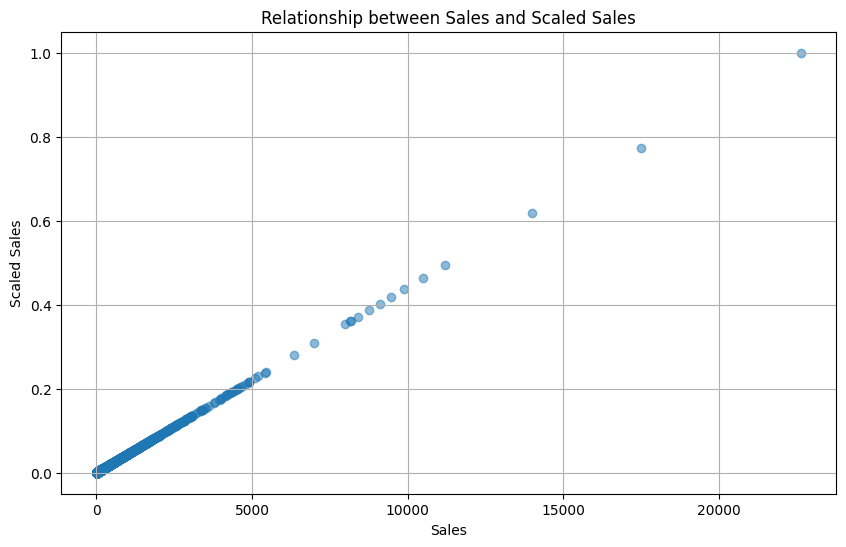

In [13]:
# visualize the relationship between 'Sales' and 'Sales_scaled'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(sales_df_encoded['Sales'], sales_df_encoded['Sales_scaled'], alpha=0.5)
plt.title('Relationship between Sales and Scaled Sales')
plt.xlabel('Sales')
plt.ylabel('Scaled Sales')
plt.grid(True)
plt.show()

* The scatter plot suggests a linear relationship between `'Sales' and 'Sales_scaled.`
* The high intensity of dots within the range `0 - 0.2` indicated that the majority of sales values are concentrated in the lower range of scaling.

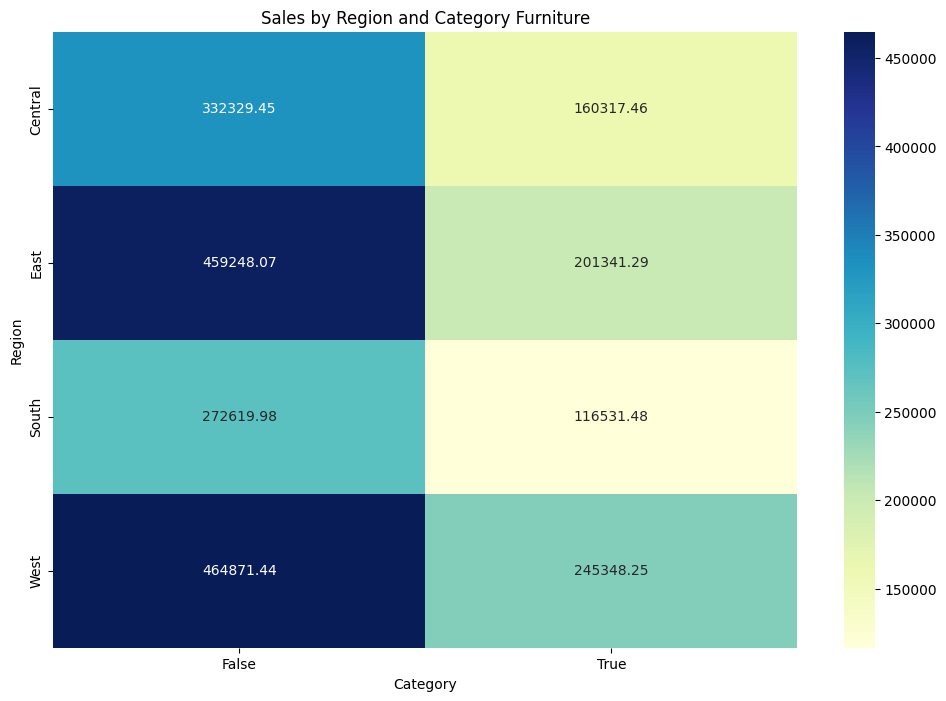

In [14]:
import seaborn as sns

# Aggregate sales data by region and category
sales_by_region_category = sales_df_encoded.groupby(['Region', 'Category_Furniture'])['Sales'].sum().reset_index()

# Create pivot table for heatmap
heatmap_data = sales_by_region_category.pivot(index='Region', columns='Category_Furniture', values='Sales')

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Sales by Region and Category Furniture')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()


The heatmap indicates that highest number of sales for furniture in `West region` followed by `East region`.

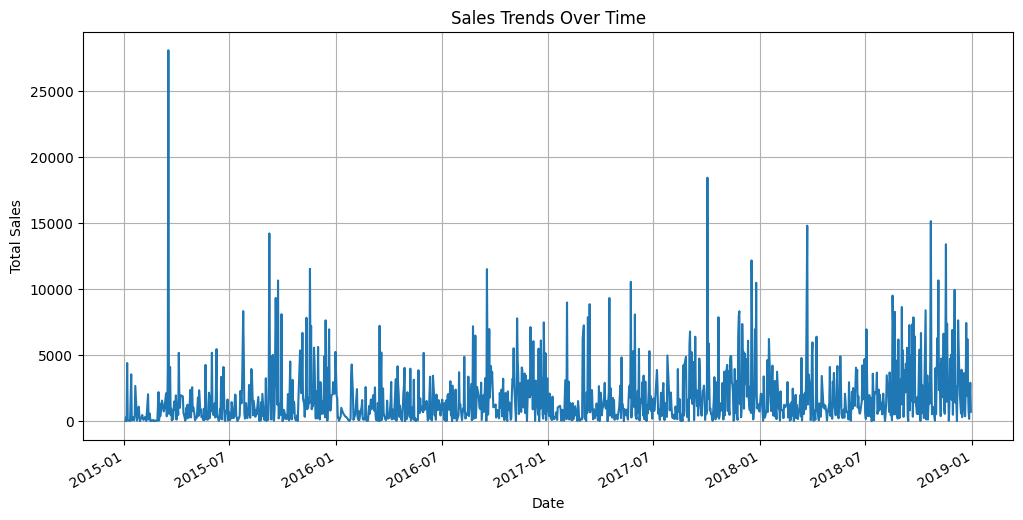

In [15]:
# Convert 'Order Date' to datetime format with the correct format
sales_df_encoded['Order Date'] = pd.to_datetime(sales_df_encoded['Order Date'], format='%d/%m/%Y')

# Aggregate sales data by date
sales_by_date = sales_df_encoded.groupby('Order Date')['Sales'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


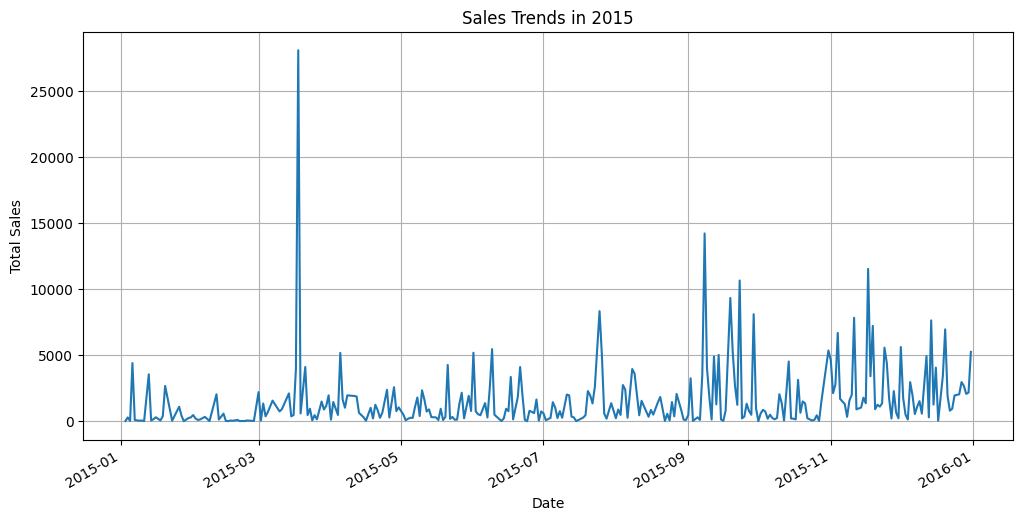

In [16]:
# Filter sales data for the year 2015
sales_2015 = sales_by_date['2015']

# Plot sales trends for 2015
plt.figure(figsize=(12, 6))
sales_2015.plot()
plt.title('Sales Trends in 2015')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


* In the above chart, we noticed a big jump in sales, especially in May. This sudden increase might be an unusual occurrence, or in other words, an outlier. 
* To understand if May's sales are significantly different from the usual, we're comparing them with the overall sales trends. This comparison will help us figure out if May's sales are a one-time event or if they fit the normal patterns we see in the data.

In [17]:
# Calculate statistical measures for entire dataset
mean_sales = sales_by_date.mean()
median_sales = sales_by_date.median()
std_sales = sales_by_date.std()

print("Statistical measures for entire dataset:")
print('mean: ',sales_by_date.mean())
print('median: ',sales_by_date.median())
print('std: ',sales_by_date.std())

Statistical measures for entire dataset:
mean:  1832.878285353946
median:  1053.614
std:  2283.923773022681


In [18]:
# Filter sales data for the month of the spike (e.g., May 2015)
sales_spike_month = sales_by_date['2015-05']

# Calculate statistical measures for the spike month
mean_sales_spike_month = sales_spike_month.mean()
median_sales_spike_month = sales_spike_month.median()
std_sales_spike_month = sales_spike_month.std()

In [19]:
print("\nStatistical measures for the spike month (May 2015):")
print("Mean:", mean_sales_spike_month)
print("Median:", median_sales_spike_month)
print("Standard Deviation:", std_sales_spike_month)


Statistical measures for the spike month (May 2015):
Mean: 844.4393928571428
Median: 359.119
Standard Deviation: 960.2571388690188


* The sales in May 2015 are significantly lower than the average for the entire dataset. 
* This suggests that May's sales might be unusual, possibly an outlier. The lower mean, median, and standard deviation for May indicate a deviation from the typical sales pattern

# Strategies for handling outliers and anomilies
1. **Visual Inspection:** Plotting the data can help visually identify outliers. Techniques like box plots, scatter plots, or histograms can highlight data points that lie far from the majority.
1. **Statistical Methods:** Utilize statistical measures such as z-scores, which quantify how many standard deviations a data point is from the mean. Data points with high z-scores may indicate outliers.
1. **Data Removal:** In some cases, outliers may be errors or anomalies that need to be removed from the dataset. However, this should be done cautiously, ensuring that valid data points are not inadvertently discarded.
1. **Data Imputation:** For missing values caused by outliers, imputation methods such as mean substitution or regression imputation can be employed to estimate the missing values based on other data points.

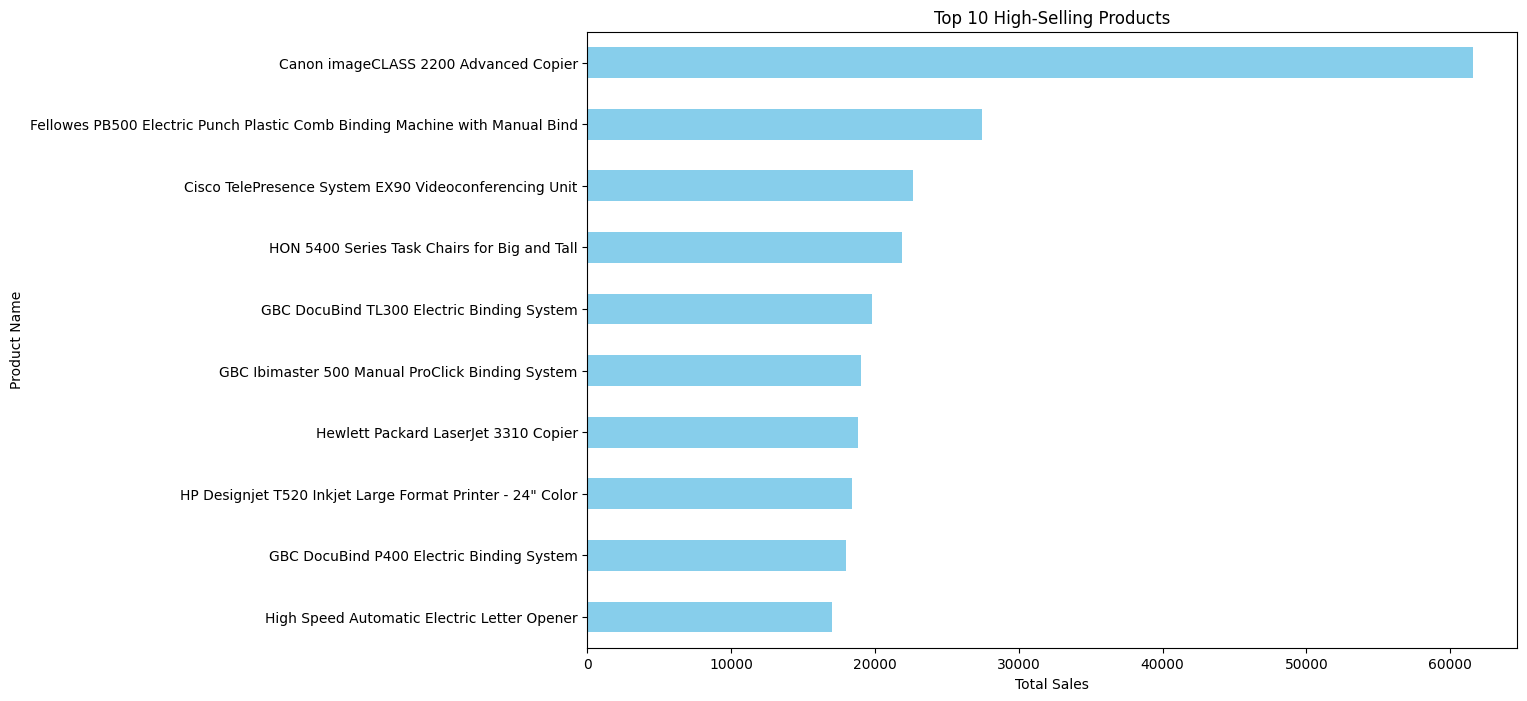

In [20]:
# Aggregate sales data by product name
sales_by_product = sales_df_encoded.groupby('Product Name')['Sales'].sum()

# Sort products by sales volume in descending order
top_selling_products = sales_by_product.sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(12, 8))
top_selling_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 High-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Invert y-axis to display highest sales at the top
plt.show()


The above chart shows the top 10 selling products & `Canon Image CLASS 2200 Advance Copier` appears to be the top selling product.

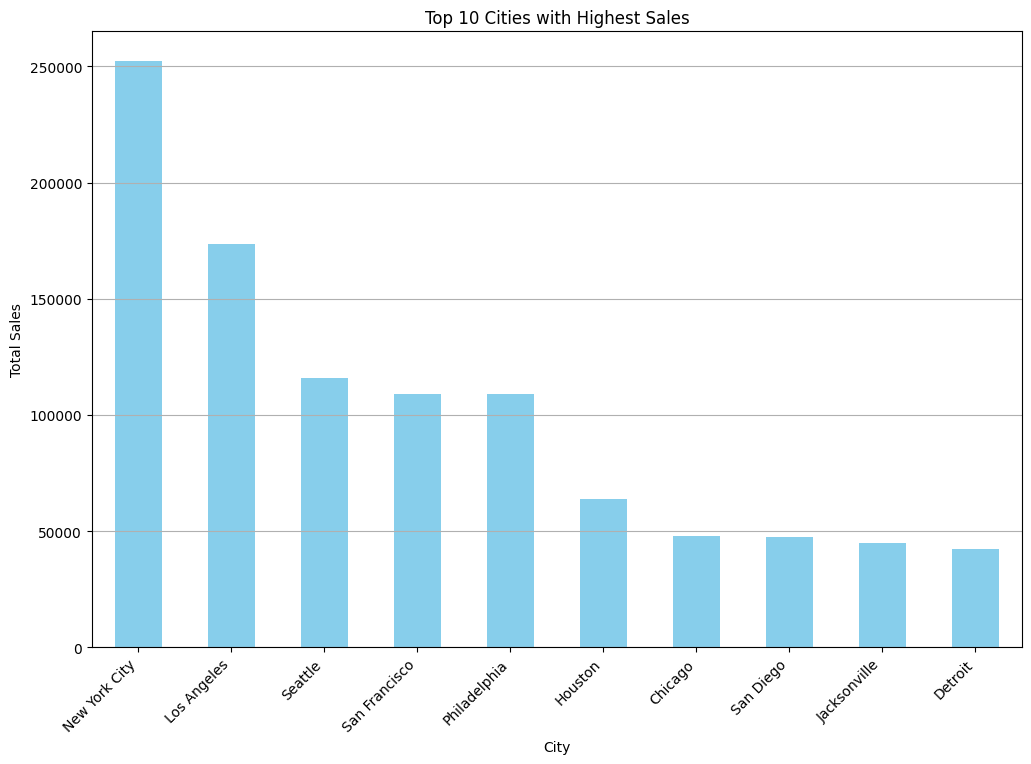

In [21]:
# Aggregate sales data by country
sales_by_city = sales_df_encoded.groupby('City')['Sales'].sum()

# Sort cities based on total sales
sorted_cities = sales_by_city.sort_values(ascending=False)

# Select the top 10 cities with the highest sales
top_10_cities = sorted_cities.head(10)

# Plot sales by city
plt.figure(figsize=(12, 8))
top_10_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Highest Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()


The above graph shows the `top 10 cities` with highest number of sales.
1. New York
1. Los Angeles
1. Seattle
1. San Francisco
1. Philidelphia
1. Houston
1. Chicago
1. San Diego
1. Jacksonville
1. Detroit

